In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from plotly import express as px
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeavePOut, LeaveOneOut, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn import tree
pyplot.style.use('fivethirtyeight')
pyplot.style.use('dark_background')

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [22]:
dataset = pd.read_csv('data.csv')

In [23]:
dataset.columns


Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

Temperature (K) : Yıldız Sıcaklığı Kelvin cinsinden  
Luminosity(L/Lo) : Yıldızların gerçek parlaklıkları  
Radius(R/Ro) : Yıldız yarıçapı  
Absolute magnitude(Mv): Yıldızların Dünyadan gözlenen parlaklıkları  
Star type : Yıldız türü  
Star color : Yıldız Rengi  
Spectral Class: Yıldız sınıfı  

Brown Dwarf -> Star Type = 0  
Red Dwarf -> Star Type = 1  
White Dwarf-> Star Type = 2  
Main Sequence -> Star Type = 3  
Supergiant -> Star Type = 4  
Hypergiant -> Star Type = 5  

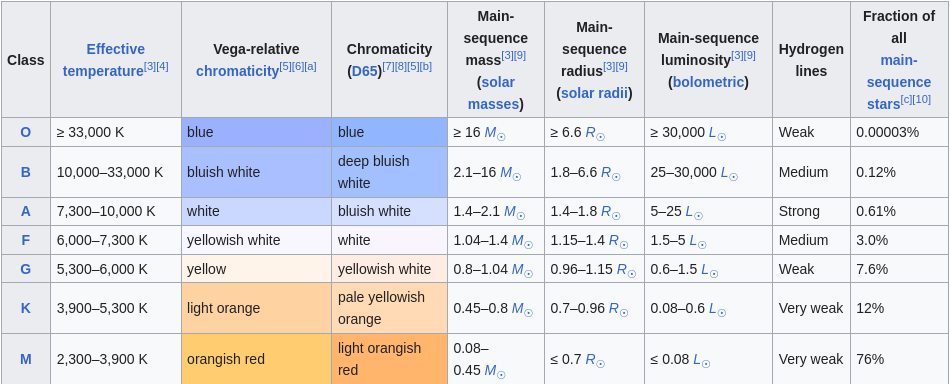

In [24]:
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [25]:
dataset.tail(5)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [26]:
num_rows, num_cols = dataset.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 240
Number of columns: 7


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [28]:
dataset["Star color"].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [29]:
dataset["Spectral Class"].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [30]:
unique_star_colors = dataset["Star color"].unique()
star_color_dict = {color: index for index, color in enumerate(unique_star_colors)}


unique_star_class = dataset["Spectral Class"].unique()
star_class_dict = {s_class: index for index, s_class in enumerate(unique_star_class)}

star_color_dict,star_class_dict

({'Red': 0,
  'Blue White': 1,
  'White': 2,
  'Yellowish White': 3,
  'Blue white': 4,
  'Pale yellow orange': 5,
  'Blue': 6,
  'Blue-white': 7,
  'Whitish': 8,
  'yellow-white': 9,
  'Orange': 10,
  'White-Yellow': 11,
  'white': 12,
  'Blue ': 13,
  'yellowish': 14,
  'Yellowish': 15,
  'Orange-Red': 16,
  'Blue white ': 17,
  'Blue-White': 18},
 {'M': 0, 'B': 1, 'A': 2, 'F': 3, 'O': 4, 'K': 5, 'G': 6})

In [31]:
dataset_replaced = dataset.copy()
dataset_replaced["Star color"] = dataset_replaced["Star color"].replace(star_color_dict)
dataset_replaced.head()

dataset_replaced["Spectral Class"] = dataset_replaced["Spectral Class"].replace(star_class_dict)
dataset_replaced.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0


In [32]:
dataset_replaced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int64  
 6   Spectral Class          240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


In [33]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.000000,10497.462500,9552.425037,1939.000000,3344.250000,5776.000000,15055.500000,40000.000000
Luminosity(L/Lo),240.000000,107188.361635,179432.244940,0.000080,0.000865,0.070500,198050.000000,849420.000000
Radius(R/Ro),240.000000,237.157781,517.155763,0.008400,0.102750,0.762500,42.750000,1948.500000
Absolute magnitude(Mv),240.000000,4.382396,10.532512,-11.920000,-6.232500,8.313000,13.697500,20.060000
Star type,240.000000,2.500000,1.711394,0.000000,1.000000,2.500000,4.000000,5.000000


In [34]:
fig = px.box(dataset, x="Star type", y="Temperature (K)", template = 'plotly_dark', 
             title = 'Representation of Type of Stars with Temperature')
fig.show()

In [35]:
count_df = dataset.groupby(['Spectral Class', 'Star type']).size().reset_index(name='Count')
spectral_class_order = ['O', 'B', 'A', 'F', 'G', 'K', 'M'][::-1]
count_df['Spectral Class'] = pd.Categorical(count_df['Spectral Class'], categories=spectral_class_order)
count_df.sort_values(by = ['Spectral Class','Star type'], inplace=True)
count_df.reset_index(drop=True, inplace=True)

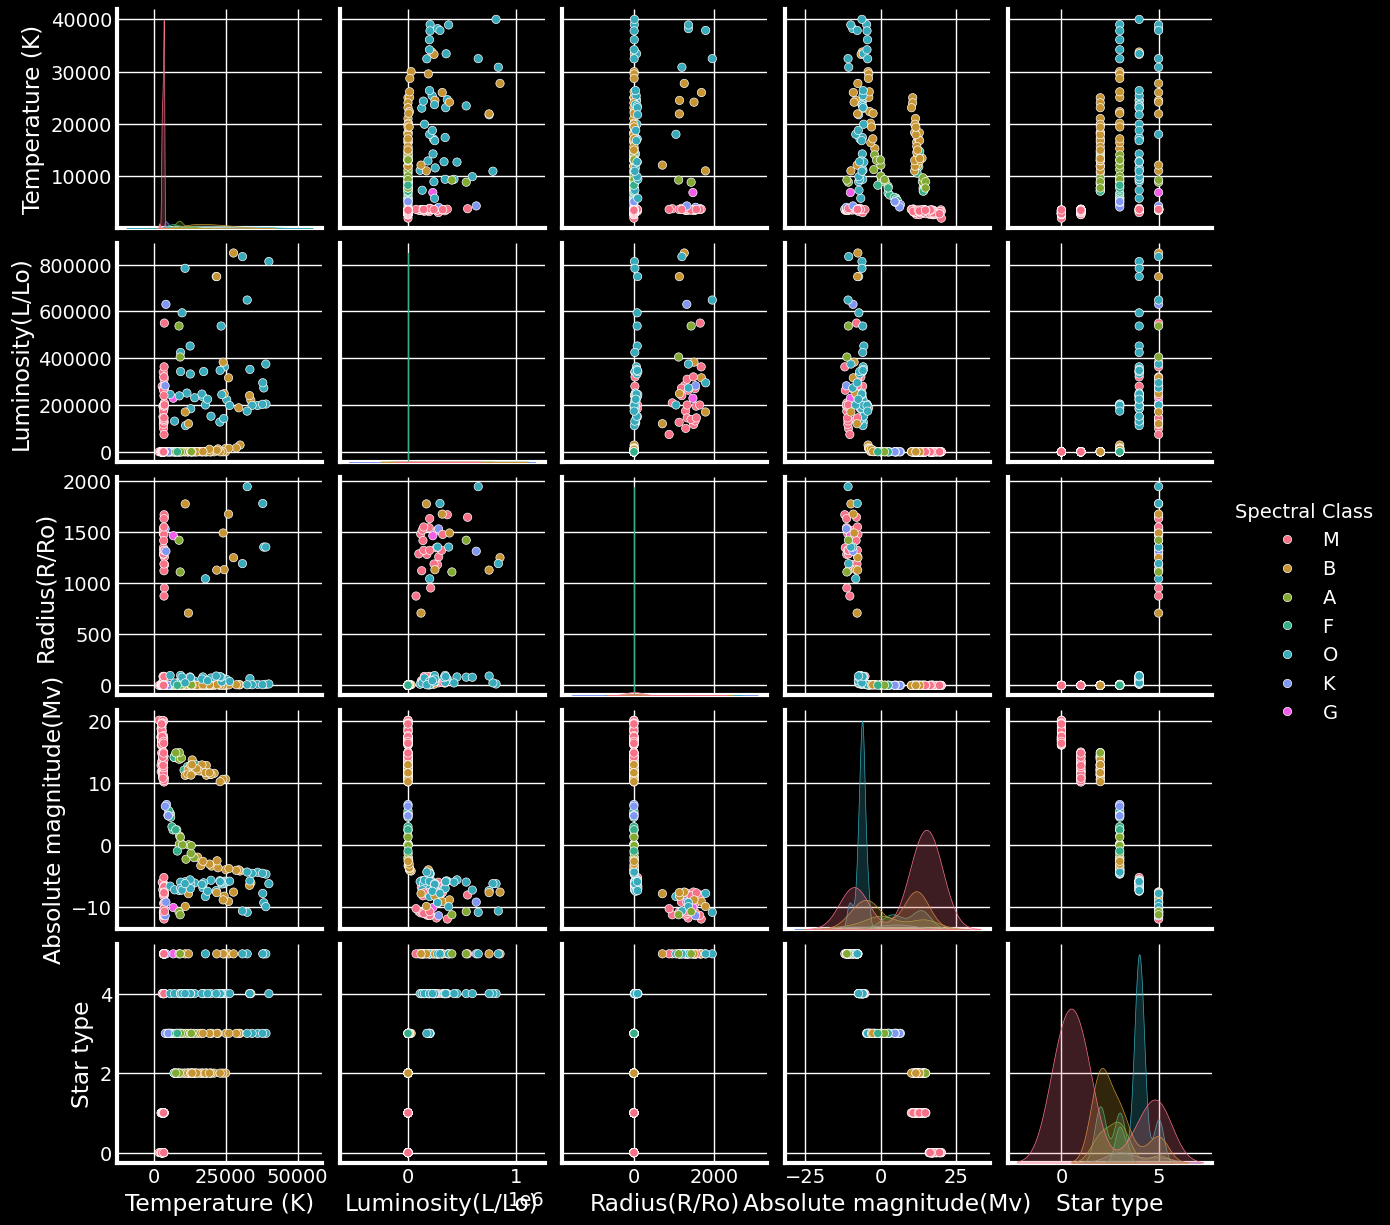

In [36]:
sns.pairplot(dataset, hue="Spectral Class", palette="husl");


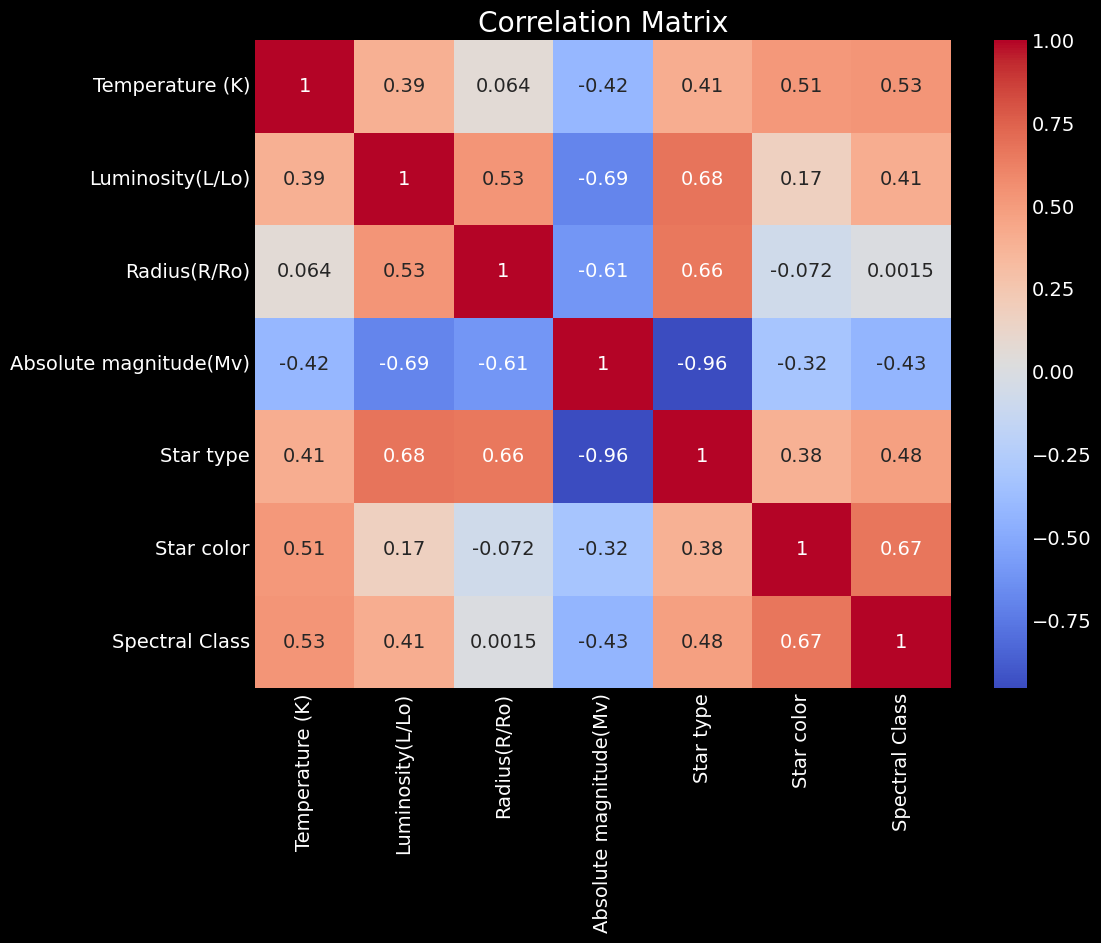

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129,0.511937,0.527404
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845,0.171555,0.409473
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975,-0.071551,0.001467
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276,-0.318700,-0.433673
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000,0.382211,0.477165
Star color,0.511937,0.171555,-0.071551,-0.318700,0.382211,1.000000,0.667036
Spectral Class,0.527404,0.409473,0.001467,-0.433673,0.477165,0.667036,1.000000


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = dataset_replaced.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
correlation_matrix


49

In [65]:
for i in range(len(correlation_matrix)):
    print(i)
    print(correlation_matrix.iloc[i][])

0
0.06421597240596887
1
0.5265157243480013
2
1.0
3
-0.60872823284656
4
0.6609752654498467
5
-0.07155136319757188
6
0.001467097976965977
